5 a)

i) Let $W_{ii}=w^{(i)}$, then $J(\theta)=(X\theta-y)^TW(X\theta-y)$.

ii)

$J(\theta)=(X\theta-y)^i W_{ij} (X\theta-y)^j$

$\nabla_\theta J(\theta)_k=X^i_kW_{ij}(X\theta-y)^j+(X\theta-y)^i W_{ij}X^j_k=X^i_kW_{ii}(X\theta-y)^i+(X\theta-y)^iW_{ii}X^i_k=2X^i_kW_{ii}(X\theta-y)^i=2X^TW(X\theta-y)$.

Setting $\nabla_\theta J(\theta)=0$ gives $X^TWX\theta=X^TWy$, which gives $\theta=(X^TWX)^{-1}X^TWy$.

iii)

The maximum likelihood estimator maximizes $\ell(\theta)=\log(\prod_{i=1}^m p(y^{(i)}|x^{(i)};\theta))=\sum_{i=1}^m\log p(y^{(i)}|x^{(i)};\theta)=\sum_{i=1}^m-\log(\sqrt{2\pi}\sigma^{(i)})-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}$, or equivalently a $\theta$ that minimizes $\frac{1}{2}\sum_{i=1}^m\frac{1}{\sigma_i^2}(y_i-\theta^Tx_i)^2$. So, the maximum likelihood estimator of $\theta$ equals the solution to a locally weighted linear regression with weights $w^{(i)}=\frac{1}{\sigma_i^2}$.

5 b)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MSE equals:  0.3305312682137525


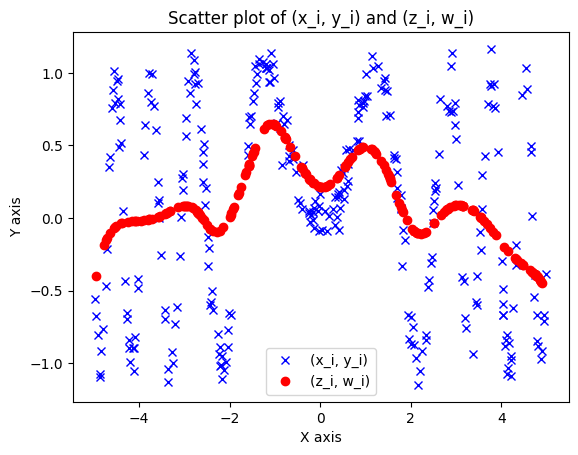

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive/cs229/problem-sets/PS1/src') # Python interpreter searches for modules/packages to import from a list of directories called 'PYTHONPATH', which is added to here
import util # import the entire '.py' file, executing any top-level code, and copying all functions, variables, and classes
from linear_model import LinearModel
sys.path.remove('/content/drive/MyDrive/cs229/problem-sets/PS1/src')  # remove added path from 'PYTHONPATH'
import matplotlib.pyplot as plt


def main(tau, train_path, eval_path):
    """Problem 5(b): Locally weighted regression (LWR)
    Args:
        tau: Bandwidth parameter for LWR.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    # *** START CODE HERE ***
    # Fit a LWR model
    model = LocallyWeightedLinearRegression(tau)
    theta = model.fit(x_train, y_train)
    # Get MSE value on the validation set
    x_valid, y_valid = util.load_dataset(eval_path, add_intercept=True)
    y_pred = model.predict(x_valid)
    MSE = np.mean((y_pred - y_valid) ** 2)
    print('MSE equals: ', MSE)
    # Plot validation predictions on top of training set
    x, y = util.load_dataset(train_path, add_intercept=False)
    z, _ = util.load_dataset(eval_path, add_intercept=False)
    plt.figure() # Create the plot
    plt.plot(x, y, 'bx', label='(x_i, y_i)') # Plot (x_i, y_i) with blue 'x' markers
    plt.plot(z, y_pred, 'ro', label='(z_i, w_i)') # Plot (z_i, w_i) with red 'o' markers
    plt.legend() # Adding legend to differentiate the points
    plt.title('Scatter plot of (x_i, y_i) and (z_i, w_i)') # Adding titles and labels (optional)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show() # Display the plot
    # No need to save predictions
    # Plot data
    # *** END CODE HERE ***


class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).
    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.
        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.
        Args:
            x: Inputs of shape (m, n).
        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        output = np.zeros(m)
        for i in range(m):
          x0 = x[i]
          w = np.exp(- np.sum((self.x-x0)**2, axis=1) / (2 * (self.tau ** 2)))
          theta = np.linalg.inv((self.x).T @ np.diag(w) @ self.x) @ (self.x).T @ np.diag(w) @ self.y
          output[i] = np.dot(theta, x0)
        return output
        # *** END CODE HERE ***

if __name__ == '__main__':
  tau = 0.5
  train_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds5_train.csv'
  eval_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds5_valid.csv'
  main(tau, train_path, eval_path)

5 c)

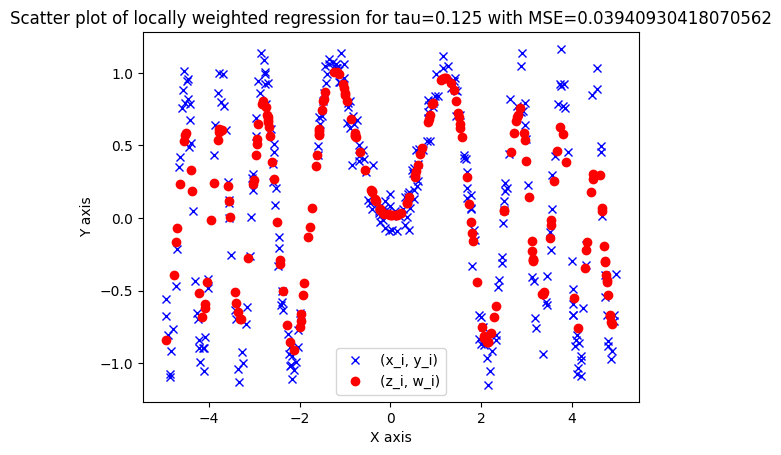

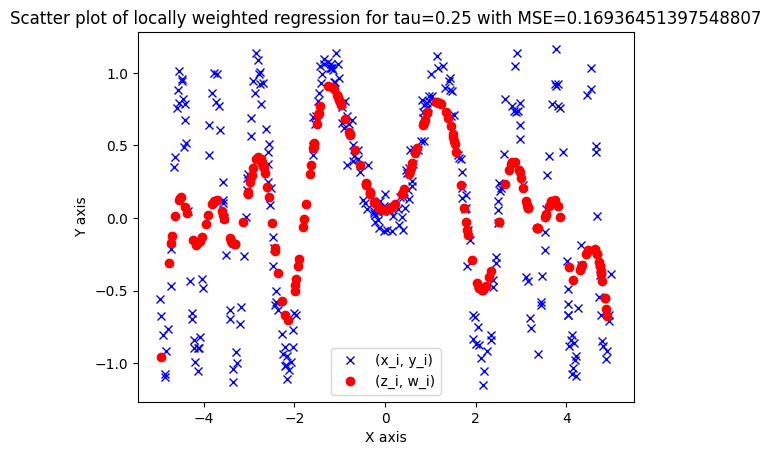

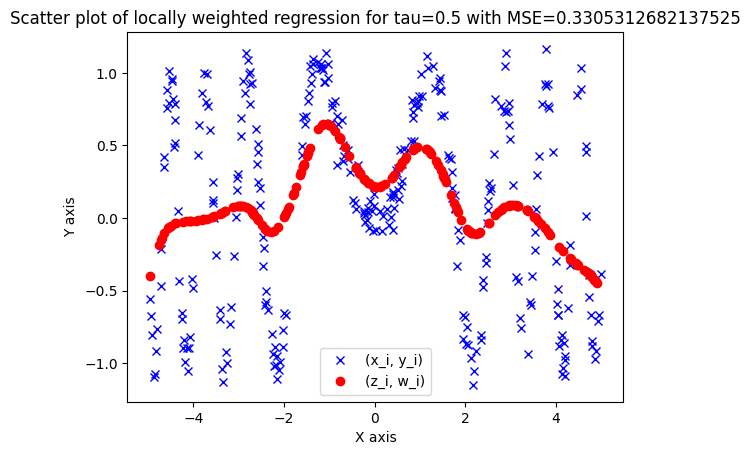

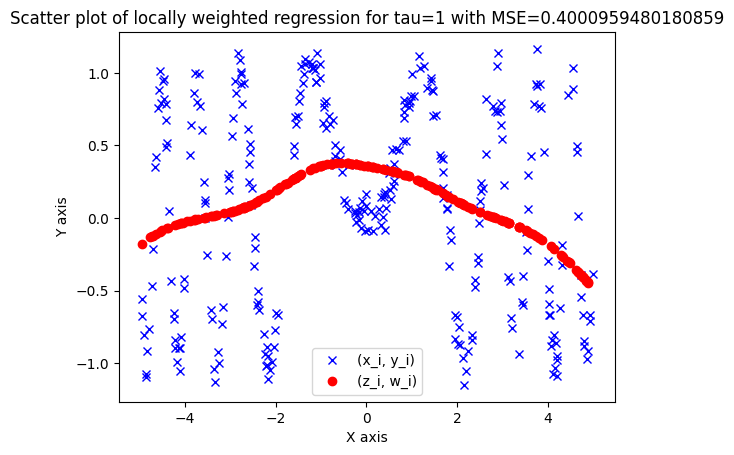

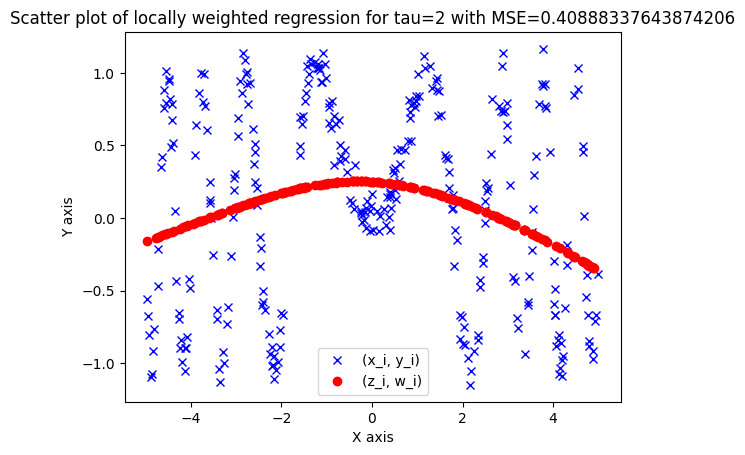

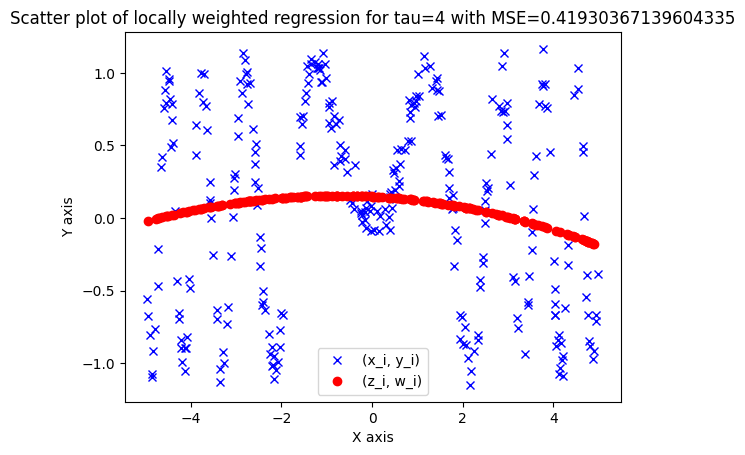

Optimal MSE equals: 0.03940930418070562


In [11]:
def main(tau_values, train_path, valid_path, test_path, pred_path):
    """Problem 5(b): Tune the bandwidth paramater tau for LWR.
    Args:
        tau_values: List of tau values to try.
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    # *** START CODE HERE ***
    # Search tau_values for the best tau (lowest MSE on the validation set)
    # Plot validation predictions on top of training set
    def plot_predictions(y_pred, t, m):
      x, y = util.load_dataset(train_path, add_intercept=False)
      z, _ = util.load_dataset(valid_path, add_intercept=False)
      plt.figure() # Create the plot
      plt.plot(x, y, 'bx', label='(x_i, y_i)') # Plot (x_i, y_i) with blue 'x' markers
      plt.plot(z, y_pred, 'ro', label='(z_i, w_i)') # Plot (z_i, w_i) with red 'o' markers
      plt.legend() # Adding legend to differentiate the points
      plt.title('Scatter plot of locally weighted regression for tau=' + str(t) + ' with MSE=' + str(m)) # Adding titles and labels (optional)
      plt.xlabel('X axis')
      plt.ylabel('Y axis')
      plt.show() # Display the plot
    x_valid, y_valid = util.load_dataset(eval_path, add_intercept=True)
    optimal_tau = tau_values[0]
    minimal_MSE = float('inf')
    for t in tau_values:
      model = LocallyWeightedLinearRegression(t)
      theta = model.fit(x_train, y_train)
      y_pred = model.predict(x_valid)
      MSE = np.mean((y_pred - y_valid) ** 2) # Get MSE value on the validation set
      if MSE < minimal_MSE:
        minimal_MSE = MSE
        optimal_tau = t
      plot_predictions(y_pred, t, MSE)
    # Fit a LWR model with the best tau value
    model = LocallyWeightedLinearRegression(optimal_tau)
    theta = model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)
    MSE = np.mean((y_pred - y_valid) ** 2) # Get MSE value on the validation set
    print("Optimal MSE equals: " + str(MSE))
    # Run on the test set to get the MSE value
    # Save predictions to pred_path
    np.savetxt(pred_path, y_pred, delimiter=',', fmt='%f')
    # Plot data (plotted)
    # *** END CODE HERE ***

if __name__ == '__main__':
  tau_values = [0.125, 0.25, 0.5, 1, 2, 4]
  train_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds5_train.csv'
  valid_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds5_valid.csv'
  test_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds5_test.csv'
  pred_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds5_pred.csv'
  main(tau_values, train_path, valid_path, test_path, pred_path)